In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### Have 7 columns and 159 rows of data. Species is categorical and all other columns are continuous measurement variables. Need to see what measurement values are and what each length means. 

## Column descriptions
    - Species: Species name of fish
    - Weight: Weight of fish in grams
    - Length1: Vertical length in cm
    - Length2: Diagonal length in cm
    - Length3: Cross length in cm
    - Height: Height in cm
    - Width: Diagonal width in cm

### Going to rename the lengths to interpret easier

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Do not need to worry about nulls

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


 ### Have a high std on weight. Averages across lengths are not too different.

In [6]:
df.Species.nunique()

7

### We have 7 different species

In [7]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

## Going to lower case all columns, rename length columns and lower case fish species for preperation

In [8]:
df.columns = df.columns.str.lower()
df.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
df = df.rename(columns={'length1': 'vertical_length', 'length2': 'diagonal_length', 'length3': 'cross_length'})
df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
# Lower casing species names
df.species=df.species.str.lower()

In [11]:
df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width
0,bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Going to make some custom measurements ```avg_lengths``` and estamated area```est_area```. Estimating area by assuming fish is an oval shape

In [17]:
import math
pi = math.pi

In [12]:
df['avg_lengths'] = round((df.vertical_length + df.diagonal_length + df.cross_length)/3,2)
df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width,avg_lengths
0,bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.20
1,bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.17
2,bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.17
3,bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.60
4,bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.83


In [23]:
# Using the calculation for a elipse to get an estimate in area. a=pi* major axis/2 × minor axis/2
df['est_area'] = round(pi*(df.avg_lengths /2) * (df.height /2),2)

In [28]:
df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width,avg_lengths,est_area
0,bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.20,237.05
1,bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.17,266.31
2,bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.17,264.13
3,bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.60,295.94
4,bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.83,291.54


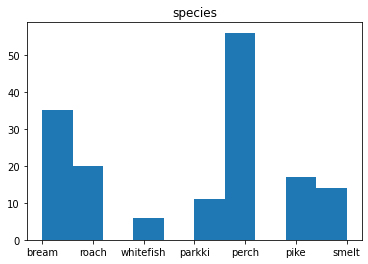

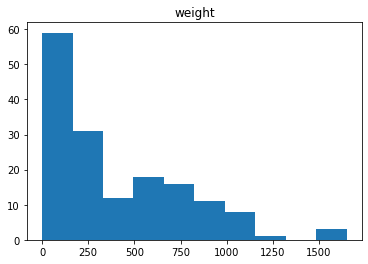

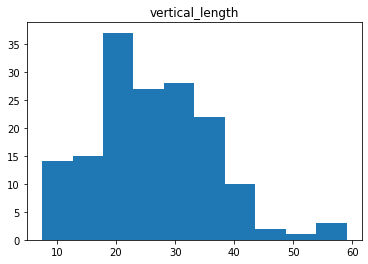

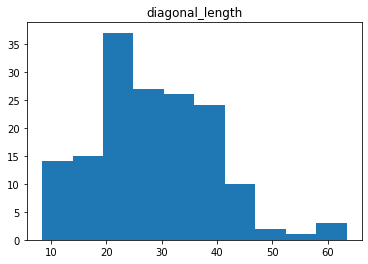

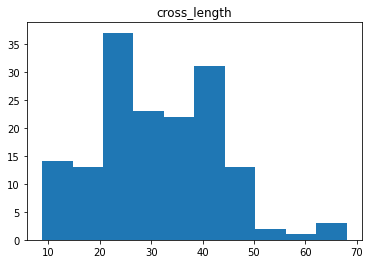

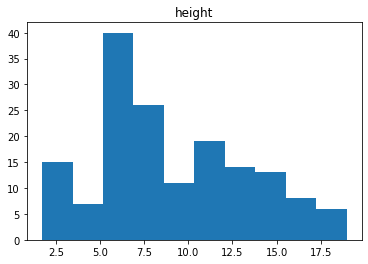

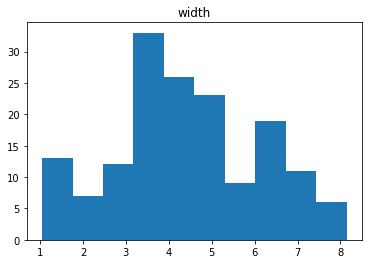

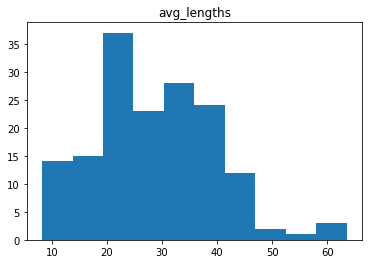

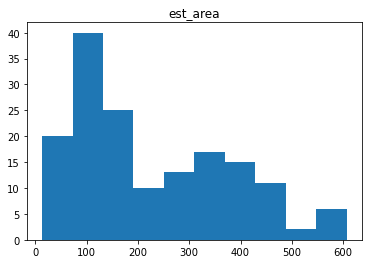

In [30]:
# Quick histograms of data
for col in df.columns:
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [31]:
def prep_fish(df):
    '''
    Function takes in a DF. Columns are lower cased, renamed to interpret easier, and creates average length 
    and estimated area variables
    '''
    # Lower case columns
    df.columns = df.columns.str.lower()
    # Lower case species names
    df.species=df.species.str.lower()
    # Renamed length columns
    df = df.rename(columns={'length1': 'vertical_length', 'length2': 'diagonal_length', 'length3': 'cross_length'})
    # Average lengths combined
    df['avg_lengths'] = round((df.vertical_length + df.diagonal_length + df.cross_length)/3,2)
    # Estimating area of fish using an elipse as shape of fish
    df['est_area'] = round(pi*(df.avg_lengths /2) * (df.height /2),2)
    return df
    

In [33]:
df1 = prep_fish(df)

In [34]:
df1

,species,weight,vertical_length,diagonal_length,cross_length,height,width,avg_lengths,est_area
0,bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.20,237.05
1,bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.17,266.31
2,bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.17,264.13
3,bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.60,295.94
4,bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.83,291.54
...,...,...,...,...,...,...,...,...,...
154,smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,12.37,20.31
155,smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,12.53,23.91
156,smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,12.97,23.19
157,smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,14.23,32.11
